In [229]:
import requests
from bs4 import BeautifulSoup
import json
import time
import pandas as pd
from datetime import datetime
from datetime import date
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

In [198]:
pip install seaborn

In [167]:
def save_file(items, path):
    with open(path, 'w', newline = '') as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow(['title', 'link', 'salary', 'city'])
        for item in items:
            writer.writerow([item['title'], item['link'], item['salary'], item['city']])

In [171]:
#URL = 'https://rabota.ua/zapros/аналитик/одесса/'
URL = 'https://rabota.ua/zapros/аналитик/украина/'
HEADERS = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:88.0) Gecko/20100101 Firefox/88.0', 'accept' : '*/*'}
HOST = 'https://rabota.ua'
FILE = 'vacancies.csv'

In [172]:
def get_html(url, params=None):
    r = requests.get(url, headers=HEADERS, params=params)
    return r

def get_pages_count(html):
    soup = BeautifulSoup(html, 'html.parser')
    pagination = soup.select('dl.f-pagination dd:not([class])')
    if pagination:
            return (int(pagination[-1].get_text().replace('…', '')))
    else:
            return 1
#    print(pagination)

def get_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('div', class_="card-body")
    
    vacancies =[]
    for item in items:
        salary = item.find('span', class_='salary')
        if salary:
            salary = salary.get_text().replace('\xa0', '')
#        elif salary = salary.get_text(''):
#            
#            salary = 'Цену уточняйте'
        else:
            salary = 'Цену уточняйте'
        vacancies.append({
            'title' : item.find('a', class_='ga_listing').get_text(strip=True),
            'link' : HOST + item.find('a', class_='ga_listing').get('href'),
            'salary' : salary,
            'city' : item.find('span', class_='location').get_text(strip=True)
        })
    return vacancies



def parse():
    html = get_html(URL)
    if html.status_code == 200:
        vacancies =[]
        get_content(html.text)
        pages_count = get_pages_count(html.text)
    
    
    
        for page in range(1, pages_count + 1):
            print(f'Парсинг страницы {page} из {pages_count}...')
            html= get_html(URL + '/pg' + str(page))
            vacancies.extend(get_content(html.text))
            time.sleep(1)
        save_file(vacancies, FILE)
        print(f'Получено {len(vacancies)} вакансий')




#        print(URL)
#        print(vacancies)
#        print(pages_count)



    else:
        print ('Error')
        
parse()

Парсинг страницы 1 из 90...
Парсинг страницы 2 из 90...
Парсинг страницы 3 из 90...
Парсинг страницы 4 из 90...
Парсинг страницы 5 из 90...
Парсинг страницы 6 из 90...
Парсинг страницы 7 из 90...
Парсинг страницы 8 из 90...
Парсинг страницы 9 из 90...
Парсинг страницы 10 из 90...
Парсинг страницы 11 из 90...
Парсинг страницы 12 из 90...
Парсинг страницы 13 из 90...
Парсинг страницы 14 из 90...
Парсинг страницы 15 из 90...
Парсинг страницы 16 из 90...
Парсинг страницы 17 из 90...
Парсинг страницы 18 из 90...
Парсинг страницы 19 из 90...
Парсинг страницы 20 из 90...
Парсинг страницы 21 из 90...
Парсинг страницы 22 из 90...
Парсинг страницы 23 из 90...
Парсинг страницы 24 из 90...
Парсинг страницы 25 из 90...
Парсинг страницы 26 из 90...
Парсинг страницы 27 из 90...
Парсинг страницы 28 из 90...
Парсинг страницы 29 из 90...
Парсинг страницы 30 из 90...
Парсинг страницы 31 из 90...
Парсинг страницы 32 из 90...
Парсинг страницы 33 из 90...
Парсинг страницы 34 из 90...
Парсинг страницы 35 из 

In [184]:
df = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/Parser/vacancies.csv', sep = ';', encoding = 'windows-1251')

In [193]:
df.fillna('ask_company')

,title,link,salary,city
0,Молодший фінансовий аналітик (стажер),https://rabota.ua/company828062/vacancy8544489,ask_company,Киев
1,Бізнес аналітик,https://rabota.ua/company548385/vacancy8432456,ask_company,Киев
2,Аналітик з фінансів,https://rabota.ua/company859340/vacancy8208358,ask_company,Киев
3,Financial Analyst,https://rabota.ua/company1913126/vacancy6935385,19600 грн,Киев
4,Аналітик маркетингових даних,https://rabota.ua/company1118015/vacancy8505101,25000 — 25000 грн,Киев
...,...,...,...,...
3564,Менеджер по закупкам,https://rabota.ua/company3203392/vacancy8502881,ask_company,Киев
3565,Cпеціаліст у сфері державних закупівель,https://rabota.ua/company2783544/vacancy8502771,15000 грн,Киев
3566,Senior Affiliate Manager,https://rabota.ua/company7377568/vacancy8223784,ask_company,Киев
3567,Специалист публичных закупок,https://rabota.ua/company10907336/vacancy8502441,8000 грн,Харьков


In [241]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
city = df.groupby (['city'], as_index = False) \
                    .agg({'link' : 'count'}) \
                    .sort_values(by=['link'], ascending = False)
city = city.query("link > 20")

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

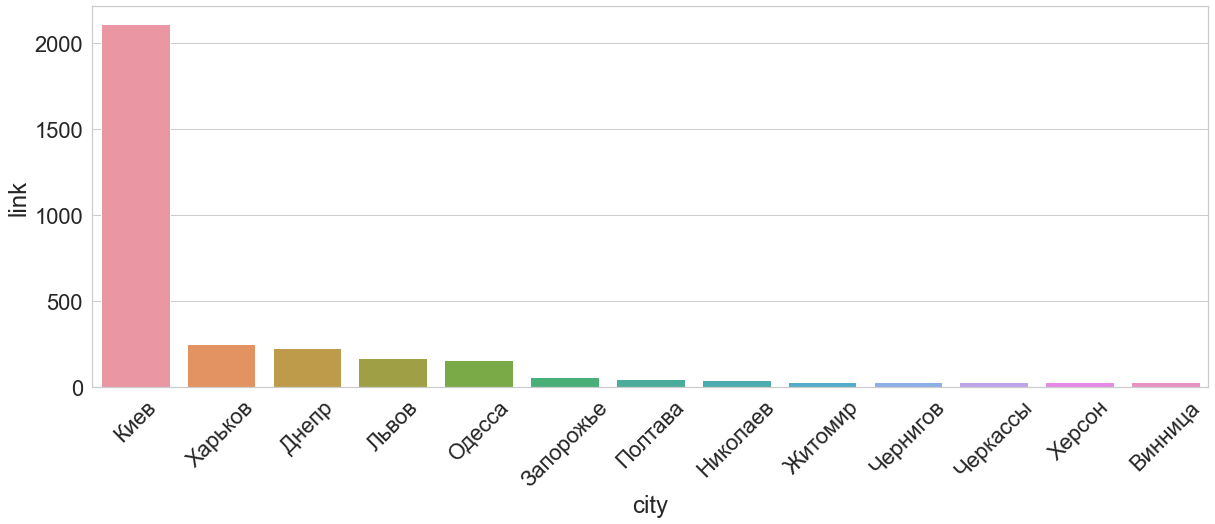

In [242]:
sns.barplot(x='city', y='link', data=city)
locs, labels = plt.xticks()
#.set_xticklabels(rotation=30)
plt.setp(labels, rotation=45)